In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
import seaborn as sns
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [67]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
crickets = pd.DataFrame(ground_cricket_data)

### Finding the linear regression equation for this data.

In [68]:
x = crickets[["Chirps/Second"]]
y = crickets[["Ground Temperature"]]

regr = linear_model.LinearRegression()
result = regr.fit(x,y)

### Chart the original data and the equation on the chart.

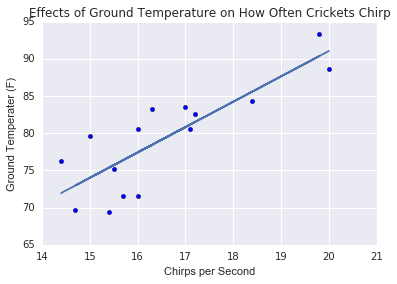

In [69]:
plt.scatter(x, y)
plt.plot(x, regr.predict(x))
plt.xlabel('Chirps per Second')
plt.ylabel('Ground Temperater (F)')
plt.title('Effects of Ground Temperature on How Often Crickets Chirp')
plt.show()

### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

##### The equation for our linear regression would be y = 3.4x + 22.8. This equations $R^2$ score is about 0.7 making it a decent fit for the data. There is, however, a wide range of chirps at each temperature that prevents this equation from truly being a good fit.  


In [70]:
print('R Score:', regr.score(x, y))
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

R Score: 0.692294652915
Coefficient: [[ 3.410323]]
Intercept: [ 22.84898231]


### Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?

### Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [71]:
print('Prediction of ground temp with 18 chirps/second:', regr.predict([[18]]))
print('Prediction of chirps/second with a ground temp of 95:', (95 - 22.8) / 3.4 )

Prediction of ground temp with 18 chirps/second: [[ 84.2347963]]
Prediction of chirps/second with a ground temp of 95: 21.23529411764706


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [72]:
br_vs_bd = pd.read_fwf("brain_body.txt")

### Find the linear regression equation for this data for brain weight to body weight.  Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

##### The linear regression equation would be y = x + 91. Based on having an $R^2$ score of -16, this equation does not fit the data well due to the clustering of the data with a few outlier data points.

In [73]:
brain = br_vs_bd[['Brain']]
body = br_vs_bd[['Body']]

lin_reg = linear_model.LinearRegression()
result = lin_reg.fit(brain,body)
print('R Score:', lin_reg.score(x, y))
print('Coefficient:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

R Score: -16.306115989
Coefficient: [[ 0.96649637]]
Intercept: [ 91.00439621]


### Chart the original data and the equation on the chart.

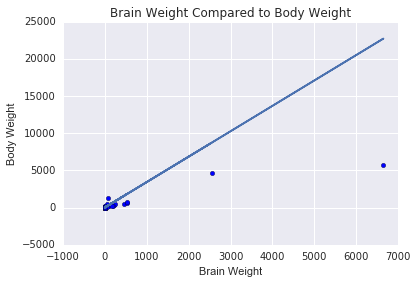

In [74]:
plt.scatter(brain, body)
plt.plot(brain, regr.predict(brain))
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.title('Brain Weight Compared to Body Weight')
plt.show()

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [75]:
salary_data = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

### Find the linear regression equation for this data using columns 1-5 to column 6.

##### The equation for our linear regression would be y = 1241.8x<sub>sex</sub> + 5586.2x<sub>rank</sub> + 482.9x<sub>year</sub> + -1331.6x<sub>degree</sub>  + -128.8x<sub>YSdeg</sub> + 11410.1. This equations $R^2$ score is about 0.85 making it a good fit for the data.  


In [76]:
cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] 
x = salary_data[cols]
y = salary_data['Salary']

lin_regr = linear_model.LinearRegression()
result = lin_regr.fit(x,y)

In [77]:
print(lin_regr.score(x, y))
print(lin_regr.intercept_)
print(lin_regr.coef_)

0.854718067441
11410.1465473
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]


### Find the selection of columns with the best $R^2$ score.
##### After checking the $R^2$ score for each combination of x-values, it was discovered that the best set of data to use would include all five x-values.


In [78]:
combinations = []
for x in range(1, 6):
    combinations.append(itertools.combinations(cols, x))

best_score = 0
for com in combinations:
    for group in com:
        group = list(group)
        salary_x = salary_data[group]
        salary_linreg = linear_model.LinearRegression()
        salary_linreg.fit(salary_x, y)
        if best_score < salary_linreg.score(salary_x, y):
            best_score = salary_linreg.score(salary_x, y)
            max_group = group
print(max_group, best_score)

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] 0.854718067441


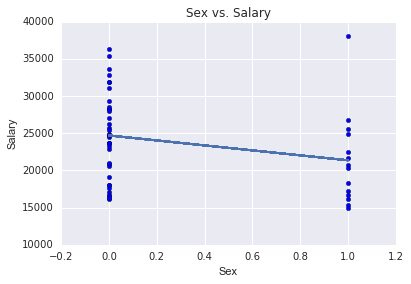

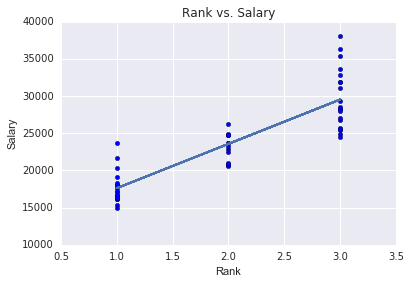

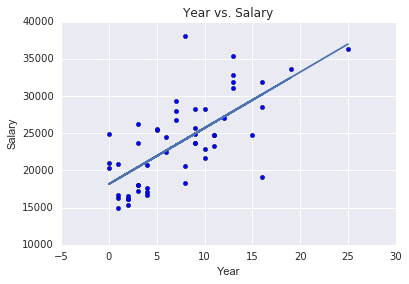

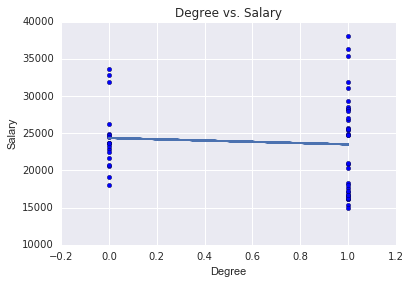

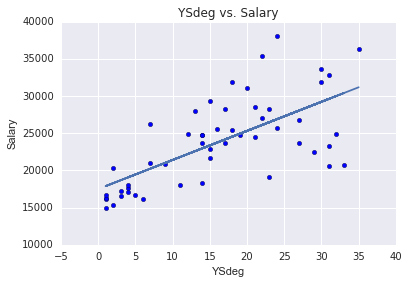

In [79]:
for item in cols:
    item_regr = linear_model.LinearRegression()
    item_regr.fit(salary_data[[item]], y)
    
    plt.scatter(salary_data[[item]], y)
    plt.plot(salary_data[[item]], item_regr.predict(salary_data[[item]]))
    plt.xlabel('{}'.format(item))
    plt.ylabel('Salary')
    plt.title('{} vs. Salary'.format(item))
    plt.show()
    

In [92]:
salary_data.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


### Observations
The following graph shows that no female has taught at this small Midwestern college for more than 10 years.  Due to this, there is not enough data to truly determine the equivalency of pay amongst men and women.  From the data available, it appears that most of the women have salaries close to, but slightly lower than their male colleagues.  There are, of course, outliers to this conclusion, as evidence by the female professor who is receiving approximately 38,000 after working at the college for only about 7 years in comparison to everyone else in that time frame is receiving less than 30,000. In fact, that particular professor has a higher salary than any other professor in this study.  

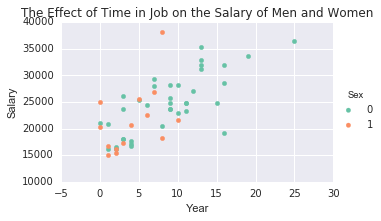

In [106]:
genders = [0, 1]
fg = sns.FacetGrid(data=salary_data, hue='Sex', hue_order=genders, aspect=1.61, palette="Set2")
fg.map(plt.scatter, 'Year', 'Salary').add_legend()
plt.title('The Effect of Time in Job on the Salary of Men and Women')
